In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
from codes.working_pipeline import Pol_Measurement, create_file_paths_recursive, create_measurement_objects,create_angle_list\
,plot_avg_with_stdev, poly_fit,trying_aic

from codes.trig_fits import cosine_model, trig_fit, tan_model, arctan_model


from codes.nice_plotting_ import plot_prettier

In [2]:
plot_prettier()

In [3]:
#stuff that i need plots for:

plots = ['DOP[%] ', 'Phase Difference[°] ', 'Power-Split-Ratio ', 'Ellipticity[°] ']

In [4]:
def getting_stuff(name, key=None):
    
    path = create_file_paths_recursive("/Users/mariavictoriabardonsoto/Desktop/payload_actual/" + name + "_data", [])
     
    
    measured_objects = create_measurement_objects(path)
    del measured_objects[0]
    keys = measured_objects[0].data_keys
    
    del keys[1]
    del keys[0]

    angle_lst = create_angle_list(measured_objects)
    idx = angle_lst.index(20)
    print(idx)
    
    
    
    
#     getting_plots(angle_lst, measured_objects, key=key, n=name)
    
    return measured_objects, keys, angle_lst
    

In [5]:
def getting_plots(angle_lst, measured_objects, key=None, n=' Str', maxfev=20000):
    
    """
    keys- list of keys 
    
    """
    list_keys = key
    
    
    if key is None:
        list_keys = ['DOLP[%] ', 'Ellipticity[°] ', 'Phase Difference[°] ','DOCP[%] ','Power-Split-Ratio ','Power[mW] ']


    for i in list_keys:
        
        print(i)
            
        if i =='Phase Difference[°] ':
            
            popt = plot_avg_with_stdev(measured_objects, i, fit=1, trig_func=trig_fit, trig_model=tan_model,maxfev=maxfev)
            plt.show()
                

        else:
            popt = plot_avg_with_stdev(measured_objects, i, fit=1, trig_func=trig_fit, trig_model=cosine_model)

            plt.show()
        

In [6]:
measured_objects, keys, angle_lst = getting_stuff('oliver')

2


# Ellipticity[°]

This is my Initial Guess: [  14.26804155 -151.52153395   -1.04699645   -6.89997519]
 
 This is the Best Fit Model: 14.3cos(-151.5x -1.0) -6.9


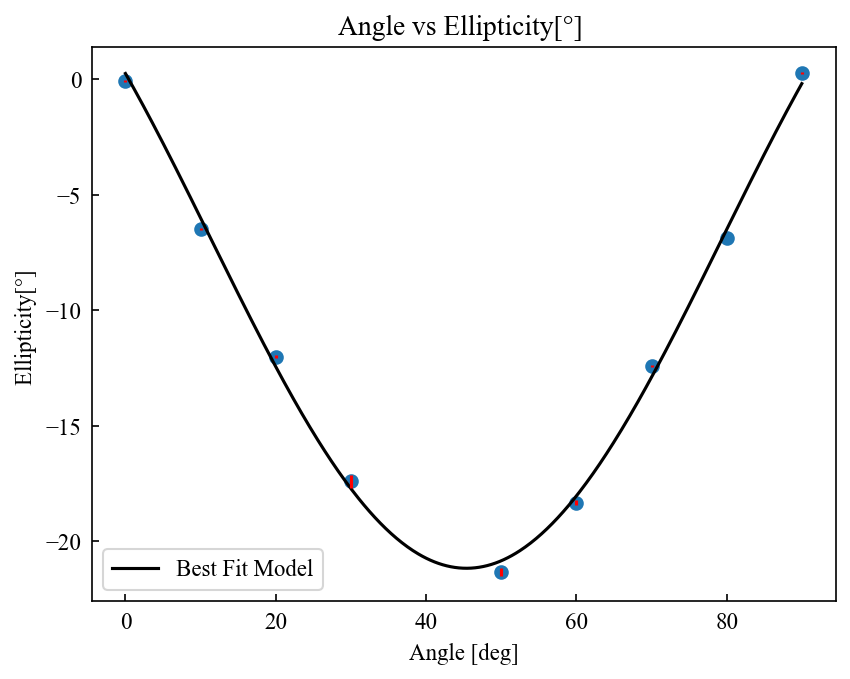

In [14]:
# let's do it individually!


p0 = [1, 80, 0, -25]

popt = plot_avg_with_stdev(measured_objects,'Ellipticity[°] ', fit=1, trig_func=trig_fit, p0=p0,trig_model=cosine_model)



print(f' This is the Best Fit Model: {popt[0]:.1f}cos({popt[1]:.1f}x {popt[2]:.1f}) {popt[-1]:.1f}')


# 'DOP[%] '

This is my Initial Guess: [ -1.11459822 461.52325903  -4.33147713  98.8943462 ]
 


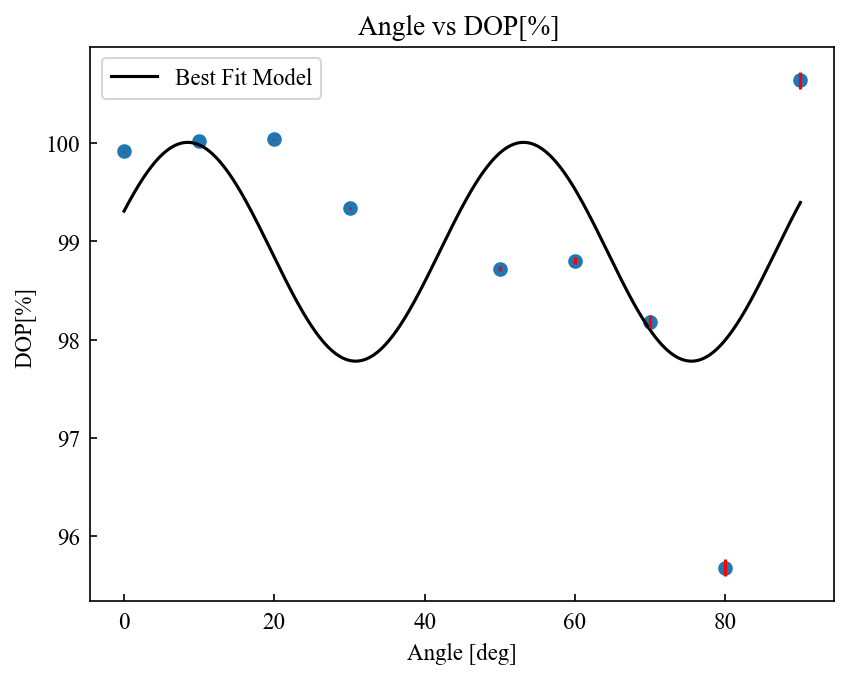

 This is the Best Fit Model: -1.1cos(461.5x -4.3) 98.9


In [11]:
p0_ = [1, 80, 0, -25]

popt_ = plot_avg_with_stdev(measured_objects,'DOP[%] ', fit=1, trig_func=trig_fit, p0=p0_,trig_model=cosine_model)


plt.show()


print(f' This is the Best Fit Model: {popt_[0]:.1f}cos({popt_[1]:.1f}x {popt_[2]:.1f}) {popt_[-1]:.1f}')


# 'Phase Difference[°] '

This is my Initial Guess: [  28.32755699    1.32471725   -0.68457723 -145.91323946]
 


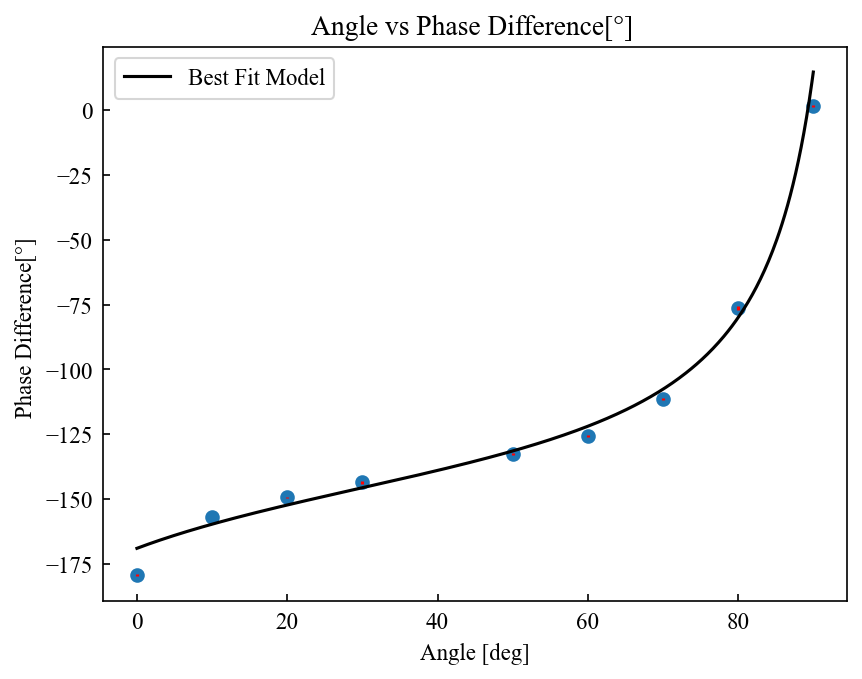

 This is the Best Fit Model: 28.3tan(1.3x -0.7) -145.9


In [15]:
pop = plot_avg_with_stdev(measured_objects,'Phase Difference[°] ', fit=1, trig_func=trig_fit,trig_model=tan_model)


plt.show()


print(f' This is the Best Fit Model: {pop[0]:.1f}tan({pop[1]:.1f}x {pop[2]:.1f}) {pop[-1]:.1f}')


# 'Power-Split-Ratio '

This is my Initial Guess: [  0.48774803 117.50920282   0.19797489   0.49835351]
 


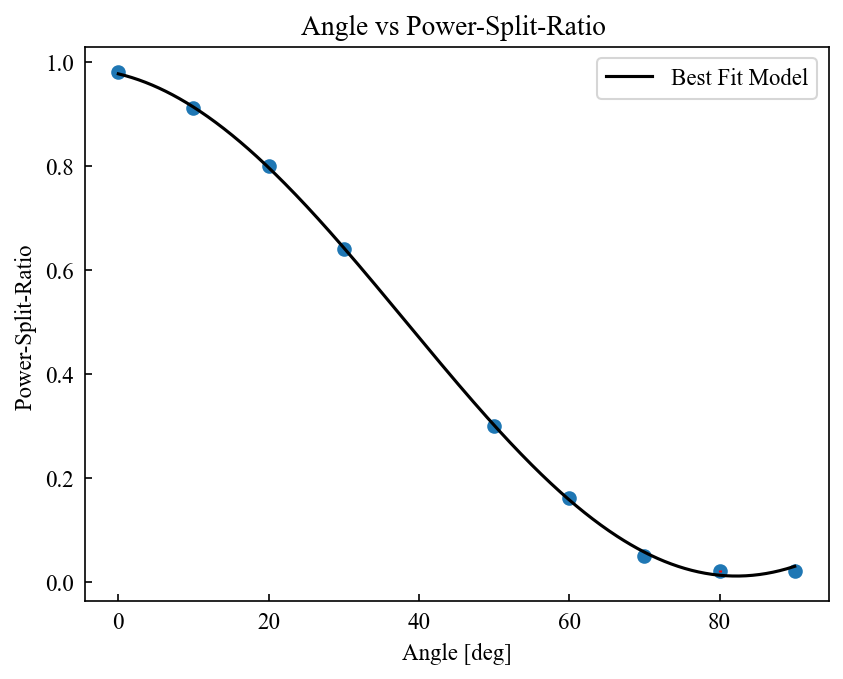

 This is the Best Fit Model: 0.5cos(117.5x + 0.2) + 0.5


In [16]:
p = plot_avg_with_stdev(measured_objects,'Power-Split-Ratio ', fit=1, trig_func=trig_fit,trig_model=cosine_model)


plt.show()


print(f' This is the Best Fit Model: {p[0]:.1f}cos({p[1]:.1f}x + {p[2]:.1f}) + {p[-1]:.1f}')
